<h1><b>Movie Rating Prediction using Python by Richard Muchoki</b></h1>

<p style="font-size:16px;">In this Jupyter Notebook I'm going to build a Machine Learning Model that predicts Movie Ratings using features like genre, director, and actors. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.</p>

<p style="font-size:16px;"><b>Columns Description:</b></p>

<ol style="font-size:16px;">
    <li>Name: Name of the movie.</li><br>
    <li>Year: The year the movie was released.</li><br>
    <li>Duration: Time duration of the movies in minutes.</li><br>
    <li>Genre: Different movie genres.</li><br>
    <li>Rating: Rating given to the movie.</li><br>
    <li>Votes: Votes given to the movie.</li><br>
    <li>Director: Director of the movie.</li><br>
    <li>Actor 1: Main actor of the movie.</li><br>
    <li>Actor 2: Second main actor of the movie.</li><br>
    <li>Actor 3: Third main actor of the movie.</li><br>
</ol>

<h1><b>1. Data Collection and Loading</b></h1>

In [171]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.Collecting mlxtend
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 819.2 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 871.5 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 871.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 655.1 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 684.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 710.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 710.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 593.9 kB/s eta 0:00:02


In [173]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Libraries
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

<h3><b>Suppress Warnings</b></h3>

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Load the Dataset
movie = pd.read_csv(r"C:\Users\Richard Muchoki\Documents\CodSoft Projects\CODSOFT\Movie Rating Prediction\Dataset\IMDb Movies India.csv", encoding="latin_1")

# Create a copy of the Dataset
movie_data = movie.copy()

movie_data

Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

In [47]:
# Describe the data
movie_data.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [49]:
movie_data.describe(include="all")

Name    Year Duration  Genre       Rating Votes      Director  \
count    15509   14981     7240  13632  7919.000000  7920         14984   
unique   13838     102      182    485          NaN  2034          5938   
top     Anjaam  (2019)  120 min  Drama          NaN     8  Jayant Desai   
freq         7     410      240   2780          NaN   227            58   
mean       NaN     NaN      NaN    NaN     5.841621   NaN           NaN   
std        NaN     NaN      NaN    NaN     1.381777   NaN           NaN   
min        NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%        NaN     NaN      NaN    NaN     4.900000   NaN           NaN   
50%        NaN     NaN      NaN    NaN     6.000000   NaN           NaN   
75%        NaN     NaN      NaN    NaN     6.800000   NaN           NaN   
max        NaN     NaN      NaN    NaN    10.000000   NaN           NaN   

            Actor 1 Actor 2 Actor 3  
count         13892   13125   12365  
unique         4718    4891    4820  
top     Ashok Kumar   Rekha    Pran  
freq            158      83      91  
mean            NaN     NaN     NaN  
std             NaN     NaN     NaN  
min             NaN     NaN     NaN  
25%             NaN     NaN     NaN  
50%             NaN     NaN     NaN  
75%             NaN     NaN     NaN  
max             NaN     NaN     NaN

In [51]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [53]:
movie_data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [55]:
movie_data.memory_usage()

Index          132
Name        124072
Year        124072
Duration    124072
Genre       124072
Rating      124072
Votes       124072
Director    124072
Actor 1     124072
Actor 2     124072
Actor 3     124072
dtype: int64

In [57]:
# Let's check for missing values in the DataFrame
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [59]:
movie_data.duplicated().sum()

6

<h1><b>2. Data Cleaning & Analysis</b></h1>

In [62]:
# Let's remove the null values
movie_data.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [64]:
movie_data = movie_data.dropna(subset = ["Year","Genre","Director","Actor 1","Actor 2","Actor 3"])

In [66]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating      3528
Votes       3527
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [68]:
movie_data = movie_data.dropna().reset_index(drop=True)

In [70]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [73]:
# Now let's convert the duration, votes, and years into numerical format

# 1. Duration
movie_data["Duration"] = movie_data.loc[:,"Duration"].str.replace(" min"," ")
movie_data["Duration"] = pd.to_numeric(movie_data.loc[:,"Duration"])

In [75]:
# 2. Votes
# This code uses regular expressions (regex=True) to remove all occurrences of $, ,, and M from the column.
movie_data["Votes"] = movie_data.loc[:,"Votes"].str.replace("[$,M]","", regex=True)
movie_data["Votes"] = pd.to_numeric(movie_data.loc[:,"Votes"])

In [77]:
# 3. Year
movie_data["Year"] = movie_data.loc[:,"Year"].str.extract(r"(\d{4})")
movie_data["Year"] = pd.to_numeric(movie_data.loc[:,"Year"])

In [80]:
# Now let's standardise the 'Genre' values

movie_data["Genre"] = movie_data.loc[:,"Genre"].str.replace("Musical", "Music")
movie_data["Genre"].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Music',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Music',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horror, M

In [82]:
# Extract the unique values and store them in a new column "Main_Genre"
# This line extracts the first word (or up to 11 characters) from the values in Genre and stores it in the new column
movie_data["Main_Genre"] = movie_data.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [84]:
movie_data["Main_Genre"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Music', 'Romance', 'Fantasy', 'Sci', 'Family', 'History',
       'Animation', 'War'], dtype=object)

In [87]:
# Let's check for duplicated data and handle them
movie_data.duplicated().sum()

0

In [89]:
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Main_Genre'],
      dtype='object')

In [92]:
# Let's handle outliers 
movie_data.describe()

Year     Duration       Rating          Votes
count  5659.000000  5659.000000  5659.000000    5659.000000
mean   1996.247570   133.439124     5.898533    2697.649585
std      19.741839    25.319939     1.381165   13651.503584
min    1931.000000    21.000000     1.100000       5.000000
25%    1983.000000   119.000000     5.000000      30.000000
50%    2002.000000   135.000000     6.100000     131.000000
75%    2013.000000   150.000000     6.900000     922.500000
max    2021.000000   321.000000    10.000000  591417.000000

In [94]:
z_scores = np.abs(stats.zscore(movie_data[['Rating', 'Votes', 'Duration']]))
movie_data = movie_data[z_scores.max(axis=1) < 3]

In [96]:
movie_data.describe()

Year     Duration       Rating         Votes
count  5547.000000  5547.000000  5547.000000   5547.000000
mean   1996.030467   133.176492     5.885163   1727.793041
std      19.771740    23.861295     1.360726   4737.655123
min    1931.000000    58.000000     1.800000      5.000000
25%    1982.000000   119.000000     5.000000     30.000000
50%    2001.000000   135.000000     6.100000    126.000000
75%    2013.000000   150.000000     6.900000    863.000000
max    2021.000000   208.000000    10.000000  43273.000000

<h3><b>Analyzing The Data</b></h3>

In [100]:
# Let's visualize the number of movies per genre
# reset_index() is used to resets the index of a DataFrame to the default one. 
# After operations like filtering, concatenation, or merging, the index may no longer be sequential. 
# This method helps re-establish a clean, sequential index.
movie_data.Main_Genre.value_counts().reset_index()

Main_Genre  count
0         Drama   1813
1        Action   1616
2        Comedy    968
3         Crime    265
4       Romance    157
5        Horror    127
6     Adventure    101
7         Music     90
8      Thriller     89
9     Biography     78
10      Mystery     58
11       Family     52
12  Documentary     45
13    Animation     40
14      Fantasy     31
15      History      8
16          Sci      4
17          War      3
18        Sport      2

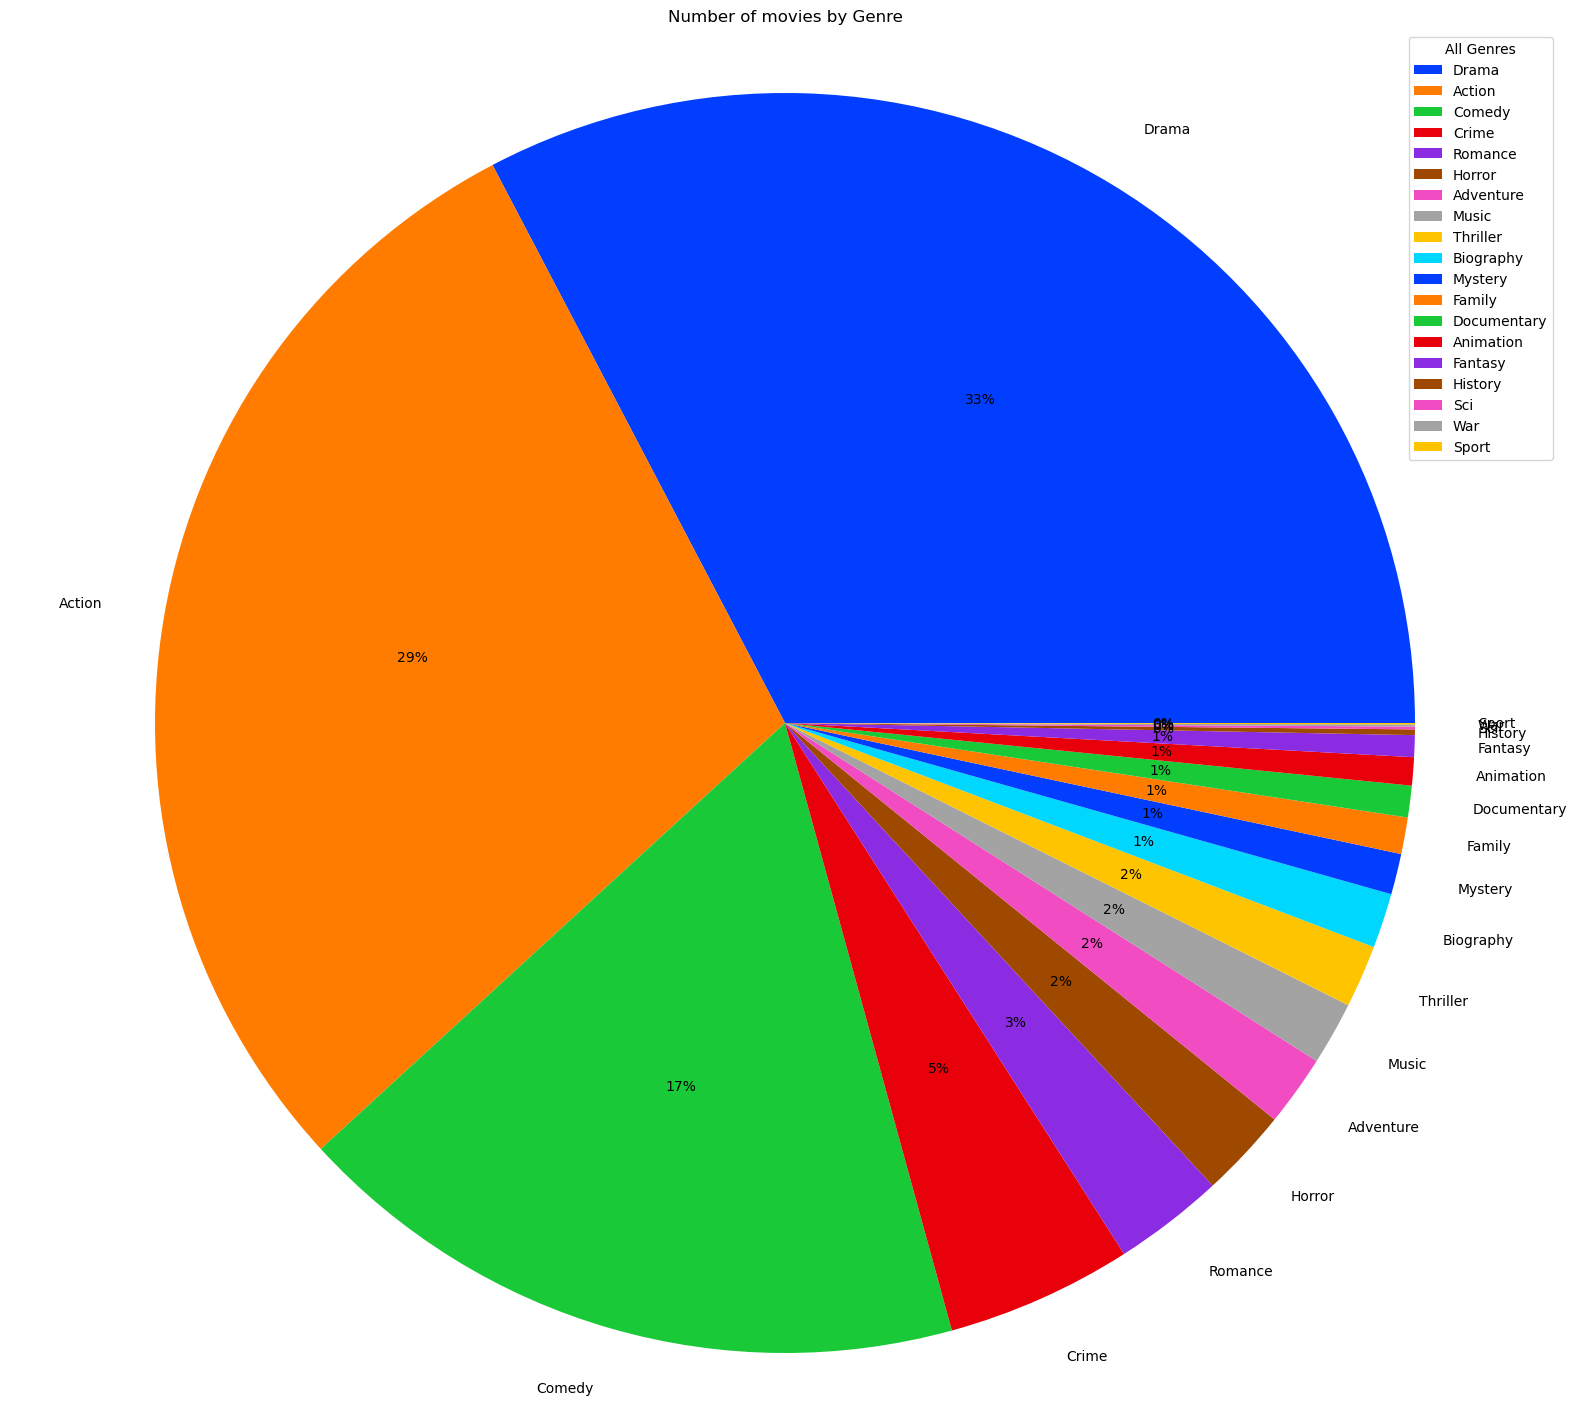

In [102]:
genres = movie_data.Main_Genre.value_counts().reset_index()

# Define threshold for hiding small slices
threshold = 0.1 # Adjust threshold as needed

# Filter out small slices for pie chart
genres = genres[genres["count"] >= threshold]


plt.figure(figsize=(20,18))  # Adjust figure size if needed
sns.set_palette("bright")  # Set color palette
plt.pie(genres["count"], labels=genres["Main_Genre"], autopct="%.0f%%")
plt.title("Number of movies by Genre")

# Create legend with all genres
plt.legend(genres["Main_Genre"], loc="best", title="All Genres")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

plt.show()

<p style="font-size:16px">The Top 3 Genres with highest number of movies are as follows:</p>
<ol style="font-size:16px">
    <li>Drama - 33%</li>
    <li>Action - 29%</li>
    <li>Comedy - 17%</li>
</ol>

In [104]:
# Let's now visualize the distribution of movies over time
movies_by_year = movie_data["Year"].value_counts().reset_index().sort_values(by="Year")
movies_by_year

Year  count
86  1931      2
89  1933      1
88  1934      2
81  1935      5
76  1936      7
..   ...    ...
1   2017    207
2   2018    192
0   2019    224
9   2020    131
41  2021     60

[90 rows x 2 columns]

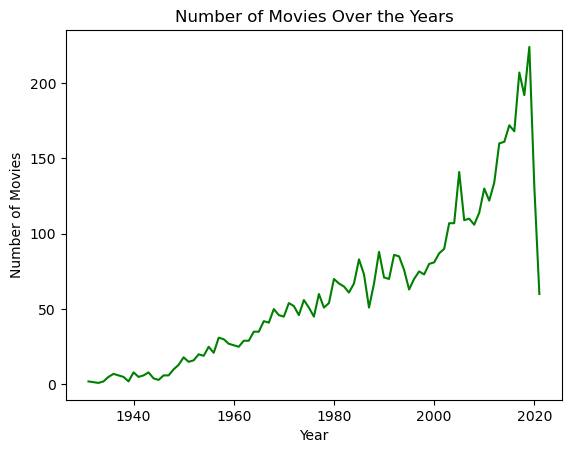

In [105]:
# Plot the figures in a distribution plot

# Create a line plot using Seaborn
sns.lineplot(x="Year", y="count", data=movies_by_year, color="green")

# Set title and labels
plt.title("Number of Movies Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

# Display the plot
plt.show()

<p style="font-size:16px;"><b>2019</b> had the highest number of movies.</p>

In [117]:
# Let's display the average rating per genre in descending order
movie_data.groupby("Main_Genre")["Rating"].mean().sort_values(ascending = False)

Main_Genre
Documentary    7.566667
History        7.225000
Biography      6.617949
Sci            6.325000
Family         6.296154
Fantasy        6.251613
Drama          6.243574
Adventure      6.132673
Music          6.121111
Crime          6.092075
Animation      6.072500
Mystery        5.815517
Comedy         5.808368
Sport          5.800000
Romance        5.589809
Action         5.510334
Thriller       5.332584
Horror         4.688976
War            4.333333
Name: Rating, dtype: float64

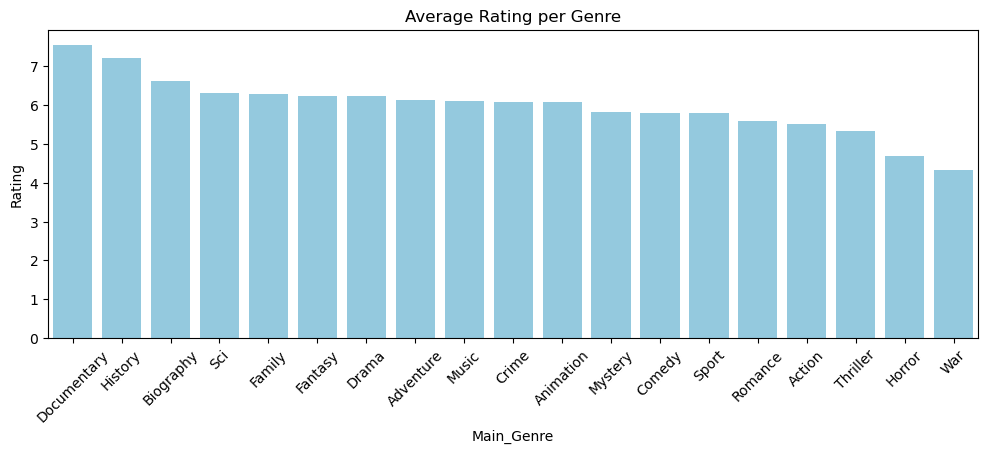

In [133]:
# Let's visualize it 
rating = movie_data.groupby("Main_Genre")["Rating"].mean().sort_values(ascending = False)


plt.figure(figsize=(12, 4))
sns.barplot(x=rating.index, y=rating.values, color="skyblue")
plt.title("Average Rating per Genre")
plt.xlabel("Main_Genre")
plt.ylabel("Rating")

plt.xticks(rotation=45) # Rotate x-axis labels for readability

plt.show()

In [137]:
# Let's calculate the average ratings and total votes for each year
# Applies aggregation functions to the specified columns:
# Rating: Calculates the mean (average) value for each year.
# Votes: Calculates the sum of the values for each year.

rating_by_years = movie_data.groupby("Year").agg({"Rating":"mean","Votes":"sum"}).reset_index()
rating_by_years

Year    Rating   Votes
0   1931  5.750000     118
1   1933  6.200000      12
2   1934  5.600000      17
3   1935  5.700000      89
4   1936  5.885714     264
..   ...       ...     ...
85  2017  5.998551  519043
86  2018  6.133854  651092
87  2019  6.253125  607584
88  2020  6.168702  440999
89  2021  6.545000   94150

[90 rows x 3 columns]

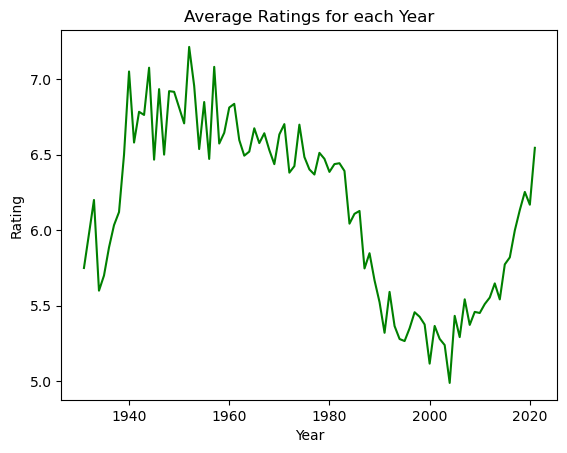

In [153]:
# Let's visualize this data

# 1. Ratings
sns.lineplot(data=rating_by_years, x="Year", y="Rating", markers=True, color="green")

plt.title("Average Ratings for each Year")
plt.xlabel("Year")
plt.ylabel("Rating")

plt.show()

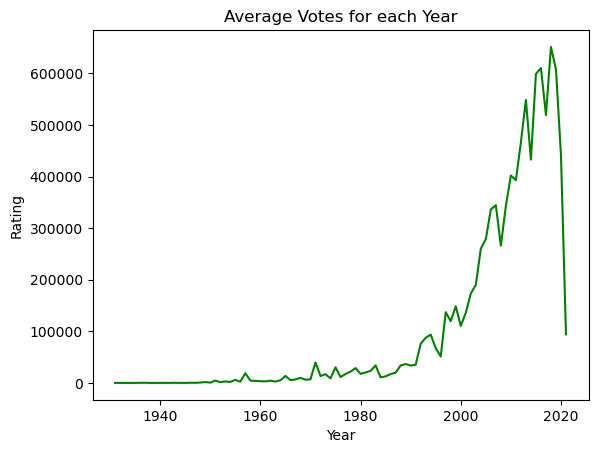

In [155]:
# 2. Votes
sns.lineplot(data=rating_by_years, x="Year", y="Votes", markers=True, color="green")

plt.title("Average Votes for each Year")
plt.xlabel("Year")
plt.ylabel("Rating")

plt.show()

<p style="font-size:16px;">1. Ratings between 1931-1990 was at all time high</p>
<p style="font-size:16px;">2. But from 1990 the number votes started to increase</p>

<Axes: ylabel='Rating'>

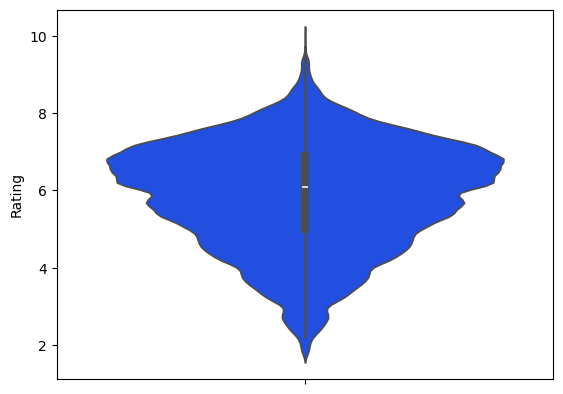

In [164]:
sns.violinplot(movie_data["Rating"], bw_adjust=.5)

<Axes: ylabel='Votes'>

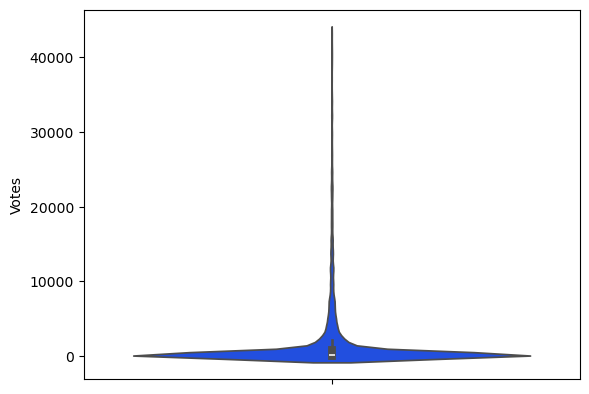

In [162]:
sns.violinplot(movie_data["Votes"], bw_adjust=.5)

<p style="font-size:16px;"><b>The distribution of votes is right/positive skewed</b> </p>

<h1><b>3. Feature Engineering</b></h1>